<a href="https://colab.research.google.com/github/chrisrutherford/biostats/blob/master/Biostatistics_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

# Turning biology into mathematics

In this lab demonstration we will access the uniprot database and create a new dataset. Our dataset will consist of four thousand proteins, half associated with the keyword antibody and the other half not related to the keyword. The proteins are represented by their primary structure sequence of amino acids, in other words each protein is a string of letters representing each amino acid in the sequence. (Don't worry if these ideas are new to you.)

The one-letter and three-letter codes for amino acids used in the knowledgebase are those adopted by the commission on Biochemical Nomenclature of the IUPAC-IUB

One-letter code	Three-letter code	Amino-acid name

A	Ala	  Alanine

R	Arg	  Arginine

N	Asn	  Asparagine

D	Asp	  Aspartic acid

C	Cys	  Cysteine

Q	Gln	  Glutamine

E	Glu	  Glutamic acid

G	Gly	  Glycine

H	His	  Histidine

I	Ile	  Isoleucine

L	Leu	  Leucine

K	Lys	  Lysine

M	Met	  Methionine

F	Phe	  Phenylalanine

P	Pro	  Proline

S	Ser	  Serine

T	Thr	  Threonine

W	Trp	  Tryptophan

Y	Tyr	  Tyrosine

V	Val	  Valine

O	Pyl	  Pyrrolysine

U	Sec	  Selenocysteine

B	Asx	  Aspartic acid or Asparagine

Z	Glx	  Glutamic acid or Glutamine

X	Xaa	  Any amino acid


In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import * # install prof's fancy python library

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-iqban96f
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-iqban96f
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5527 sha256=4e725f3b05511ce30530862da5588b5b5fc6f8e49840bbea09891ceeb80f4dc7
  Stored in directory: /tmp/pip-ephem-wheel-cache-qe7ft0vn/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# This code will create a dataset from the uniprot database
X, Y = get_uniprot_data('=antibody', '!antibody', 2000)
# X contains the antibody proteins
# Y contains the non-antibody proteins

In [3]:
number_X = len(X) # set number_X to the length of X
number_Y = len(Y) # set number_Y to the length of Y

In [4]:
print(number_X)
print(number_Y)

2000
2000


In [5]:
X[0] #Amino acid sequence of the first protein on the list of proteins associated with 'antibody'

'mvllrvlilllswvaglggqygnplnkyirhyeglsydvdslhqkhqrakravshedqflrldfhahgrhfnlrmkrdtslfseefrvetsnavldydtshiytghiygeegsfshgsvidgrfegfiqthggtfyvepaeryikdrtlpfhsviyheddikyphkygpqggcadhsvfermrkyqmtgveevtqtpqekhaingpellrkkrttvaekntcqlyiqtdhlffkyygtreaviaqisshvkaidtiyqttdfsgirnisfmvkririnttadekdptnpfrfpnigvekflelnseqnhddyclayvftdrdfddgvlglawvgapsgssggiceksklysdgkkkslntgiitvqnygshvppkvshitfahevghnfgsphdsgtectpgesknlgqkengnyimyaratsgdklnnnkfslcsirnisqvlekkrnncfvesgqpicgngmveqgeecdcgysdqckdeccydanqpegkkcklkpgkqcspsqgpcctahcafksktekcrddsdcakegicngitalcpasdpkpnftdcnrhtqvcingqcagsicekhgleectcassdgkddkelchvccmkkmepstcastgsvqwnkyflgrtitlqpgspcndfrgycdvfmrcrlvdadgplarlkkaifspelyeniaewivaywwavllmgialimlmagfikicsvhtpssnpklpppkplpgtlkrrrppqpiqqpqrqrpresyqmghmrr'

Turn protein strings of letters into vectors of numbers:

In [6]:
def process_strings(c):
    '''Takes in a list of sequences 'c' and turns each one
       into a list of numbers.'''
       
    X = [] #create empty list to prepare list of numbers
            
    for  m, seq in enumerate(c):
        x = [] 
        for letter in seq:
            x.append(max(ord(letter)-97, 0)) #convert letter of amino acid sequence to a number, append to x
        
        X.append(x) #append amino acid sequence x to list of sequences X
        
    return X

In [7]:
#run our amino acid sequences through the process_strings function
X = process_strings(X)
Y = process_strings(Y)

In [8]:
print(X[0]) # print first converted antibody amino acid sequence

[12, 21, 11, 11, 17, 21, 11, 8, 11, 11, 11, 18, 22, 21, 0, 6, 11, 6, 6, 16, 24, 6, 13, 15, 11, 13, 10, 24, 8, 17, 7, 24, 4, 6, 11, 18, 24, 3, 21, 3, 18, 11, 7, 16, 10, 7, 16, 17, 0, 10, 17, 0, 21, 18, 7, 4, 3, 16, 5, 11, 17, 11, 3, 5, 7, 0, 7, 6, 17, 7, 5, 13, 11, 17, 12, 10, 17, 3, 19, 18, 11, 5, 18, 4, 4, 5, 17, 21, 4, 19, 18, 13, 0, 21, 11, 3, 24, 3, 19, 18, 7, 8, 24, 19, 6, 7, 8, 24, 6, 4, 4, 6, 18, 5, 18, 7, 6, 18, 21, 8, 3, 6, 17, 5, 4, 6, 5, 8, 16, 19, 7, 6, 6, 19, 5, 24, 21, 4, 15, 0, 4, 17, 24, 8, 10, 3, 17, 19, 11, 15, 5, 7, 18, 21, 8, 24, 7, 4, 3, 3, 8, 10, 24, 15, 7, 10, 24, 6, 15, 16, 6, 6, 2, 0, 3, 7, 18, 21, 5, 4, 17, 12, 17, 10, 24, 16, 12, 19, 6, 21, 4, 4, 21, 19, 16, 19, 15, 16, 4, 10, 7, 0, 8, 13, 6, 15, 4, 11, 11, 17, 10, 10, 17, 19, 19, 21, 0, 4, 10, 13, 19, 2, 16, 11, 24, 8, 16, 19, 3, 7, 11, 5, 5, 10, 24, 24, 6, 19, 17, 4, 0, 21, 8, 0, 16, 8, 18, 18, 7, 21, 10, 0, 8, 3, 19, 8, 24, 16, 19, 19, 3, 5, 18, 6, 8, 17, 13, 8, 18, 5, 12, 21, 10, 17, 8, 17, 8, 13, 19, 19,

In [9]:
print(Y[0]) # print first converted non-antibody amino acid sequence

[12, 11, 3, 5, 4, 10, 15, 11, 5, 4, 8, 17, 13, 10, 8, 4, 18, 11, 10, 4, 18, 16, 3, 10, 13, 3, 21, 3, 11, 16, 4, 4, 8, 3, 12, 11, 4, 0, 18, 11, 4, 17, 4, 19, 10, 10, 8, 24, 19, 13, 11, 10, 15, 22, 3, 17, 21, 16, 8, 0, 17, 11, 16, 4, 17, 15, 19, 19, 11, 3, 24, 8, 15, 24, 8, 5, 3, 18, 5, 12, 4, 11, 7, 6, 3, 17, 13, 5, 17, 3, 3, 15, 0, 12, 8, 6, 6, 8, 6, 5, 11, 13, 6, 17, 0, 21, 19, 21, 8, 6, 16, 16, 17, 6, 10, 3, 19, 10, 3, 13, 8, 24, 17, 13, 5, 6, 12, 0, 7, 15, 4, 6, 24, 17, 10, 0, 11, 17, 11, 12, 10, 16, 0, 4, 10, 5, 13, 17, 15, 8, 5, 19, 5, 8, 3, 19, 10, 6, 0, 24, 15, 6, 10, 0, 0, 4, 4, 17, 6, 16, 18, 4, 18, 8, 0, 19, 13, 11, 8, 4, 12, 0, 18, 11, 10, 21, 15, 21, 8, 0, 8, 21, 8, 6, 4, 6, 6, 18, 6, 6, 0, 11, 6, 8, 6, 8, 0, 13, 10, 21, 11, 12, 11, 4, 13, 18, 19, 24, 18, 21, 8, 18, 15, 4, 6, 0, 0, 0, 11, 11, 22, 10, 3, 18, 13, 11, 0, 10, 8, 0, 0, 4, 19, 12, 10, 8, 19, 0, 7, 3, 8, 10, 16, 11, 6, 8, 8, 3, 3, 21, 8, 18, 4, 15, 11, 6, 6, 0, 7, 10, 3, 21, 4, 16, 16, 0, 11, 0, 8, 10, 18, 0, 5, 2

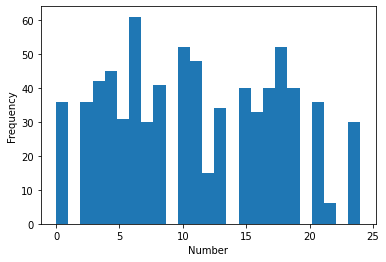

In [11]:
plt.hist(X[0],25) #view distribution of letters in the first antibody's amino acid sequence using 25 bins
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

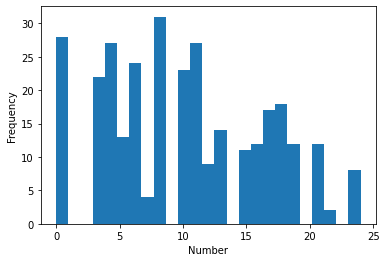

In [12]:
plt.hist(Y[0],25)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

In [14]:
np.mean(X[0]),np.std(X[0]) #meaningful? maybe. the mean can show what value (amino acid) a specific protein has most of, and the standard deviation can show the spread around that value

(10.987967914438503, 6.668917015482973)

In [15]:
np.array(X[0]).shape #length of first amino acid sequence

(748,)

Find lengths of all proteins:

In [16]:
# get a list of the length of each protein's amino acid sequence
X_lengths = [len(s) for s in X]
Y_lengths = [len(s) for s in Y]

In [17]:
np.max(X_lengths) #length of longest antibody protein sequence

5654

In [18]:
np.max(Y_lengths) #length of longest non-antibody protein sequence

11103

In [19]:
np.min(X_lengths) #length of shortest antibody protein sequence

5

In [20]:
np.min(Y_lengths) #length of shortest non-antibody protein sequence

6

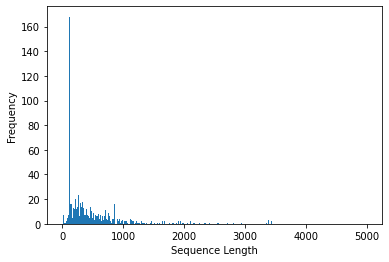

In [21]:
plt.hist(X_lengths,bins=1000,range=(0,5000)); #distribution of lengths of our antibody amino acid sequences
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

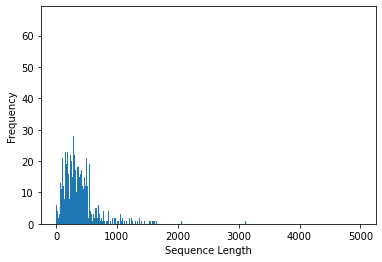

In [22]:
plt.hist(Y_lengths,bins=1000,range=(0,5000)); #distribution of lengths of our non-antibody amino acid sequences
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()